# PCA : Face Recognition



In this challenge, we will use PCA in combination with a dataset of multiple black & white image**s**

This time then:
- each image is an observation (sample)
- each pixel's luminosity level is a feature (lots of features!!)

We will use PCA to compress the picture by reducing the number of feature used to describe it.

## Load dataset

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a **lower-dimensional projection** of the data that preserves the maximal data variance.

We can then use those new representations as features to feed any model we want. It can be very useful since you often have lots of features, and you want to transform and keep a packed number of features that are the most representative of what you want to model.

__Lets load a face image dataset and apply PCA.__

In [1]:
# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

You have access to
- `faces.images` which are the matrix of __50 x 37 pixels__ you can plot 
- `faces.data` for the the flattened version in  of size __1850 x 1__ (because 50 x 37 = 1850). 
- `faces.target` which is annotation of every face to the corresponding person (as a number index)

In [2]:
# 1288 images
faces.images.shape

(1288, 50, 37)

In [3]:
# 1288 images flattened, equivalent to to faces.images.reshape(1288,1850)
faces.data.shape

(1288, 1850)

In [4]:
faces.target

array([5, 6, 3, ..., 5, 3, 5])

In [60]:
faces.target.shape

(1288,)

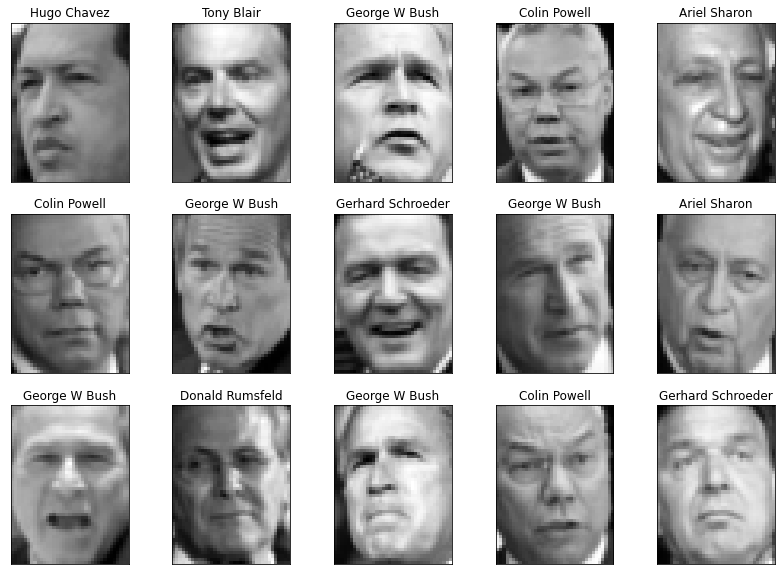

In [8]:
# Let’s visualize some faces.
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(14,17))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(())
    plt.yticks(())

## Compress images with PCA

In this scikit dataset we have 50 × 37 pixel images (1850 dimensions!). Often, so many dimensions is a lot to train algorithms we studied in the previous exercises (for example SVM). 

That's why we use PCA to reduce these features to a more manageable size, while maintaining most of the information of the dataset.

__👉 Apply PCA to the dataset (both fit and transform), to reduce dimensions to 150, by setting `n_components=150`__. Put your transformation into a variable named `data_projected`

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=150).fit(faces.data)

In [10]:
pca.components_

array([[-0.00681703, -0.00736361, -0.0085503 , ..., -0.01404502,
        -0.01195594, -0.00964072],
       [ 0.02166538,  0.02048157,  0.02229036, ..., -0.04291788,
        -0.04126056, -0.03962975],
       [-0.02165607, -0.01930312, -0.01778265, ..., -0.05017709,
        -0.04404088, -0.03936786],
       ...,
       [ 0.00669192,  0.01686672,  0.00998343, ...,  0.0842081 ,
         0.05440695,  0.01342078],
       [ 0.08829244,  0.00661749, -0.04893166, ...,  0.00838821,
        -0.02555001,  0.01442223],
       [-0.01390291,  0.01097254,  0.05610969, ...,  0.0321453 ,
         0.00789809, -0.00739342]], dtype=float32)

In [11]:
pca.components_.shape

(150, 1850)

In [12]:
data_projected = pca.transform(faces.data)

In [13]:
data_projected.shape

(1288, 150)

The face dataset was projected onto only the first 150 principal components! Again, what we call components are directions of most variance of the dataset. 

It means that now, we don't need 1850 pixels anymore to describe each images but just 150 values. A gain by factor 12.

__How is that possible?__

- The pca has found to be the most representative directions of what distinguishes faces between each other with just 150 values for every image. 

- They are the directions of most variance. 

- You can access them in `pca.components_`

👉  Look at the first component of this array of components, and its shape

In [14]:
pca.components_[0]

array([-0.00681703, -0.00736361, -0.0085503 , ..., -0.01404502,
       -0.01195594, -0.00964072], dtype=float32)

In [15]:
pca.components_[0].shape

(1850,)

As you can see, it's a vector of 1850 values. We have now 150 components of 1850 values each.

One face is now described as a combination (sum) of those components.

Let's reconstruct one image from its reduced representation to see how it works.

👉 Use `inverse_transform` on your `data_projected` to reconstruct a `data_reconstructed` dataset

In [16]:
data_reconstructed = pca.inverse_transform(data_projected)
data_reconstructed.shape

(1288, 1850)

👉 Plot the 13th picture (Gearge W Bush) of the reconstructed dataset, and compare it with the original one. 

<details>
    <summary>💡Hint</summary>

You'll have to reshape the flattened data into an "image" of dimension 2
</details>

In [17]:
data_reconstructed = data_reconstructed.reshape(faces.images.shape)
data_reconstructed.shape

(1288, 50, 37)

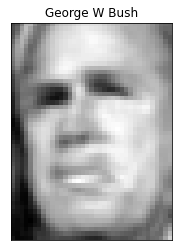

In [18]:
gwb = 12
plt.title(faces.target_names[faces.target[gwb]], size=12)
plt.imshow(data_reconstructed[gwb], cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

### 🧪 Test your code

In [19]:
from nbresult import ChallengeResult

result = ChallengeResult('projection', shape=data_projected.shape)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/06-Unsupervised-Learning/02-Face-Recognition
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_projection.py::TestProjection::test_shape PASSED              [100%]

============================== 1 passed in 0.02s ===============================


💯 You can commit your code:

git add tests/projection.pickle

git commit -m 'Completed projection step'

git push origin master


👉 (Optional) study the code below which reconstruct the image step by step without `inverse_transform`. 

Instead, we do manually the multiplication $X_{reconstructed} = X_{projected} W$ with $W$ being the `pca.components_` matrix of 150 PC in rows expressed as linear combination of 1850 pixels in columns


In [20]:
num_dimensions = 150

# We do our reconstruction over the 13th image
image_original = faces.images[12];
image_compressed = data_projected[12];

# we start the reconstruction from the mean over all images (feel free to print mean face to check!)
image_reconstructed = pca.mean_.copy(); 

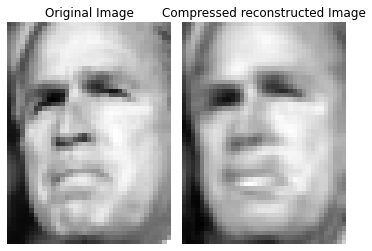

In [21]:
# Then, reconstruct the image by doing the sum of every 150 entry of its compressed representation,
# weighted by the corresponding principal components
for i in range(num_dimensions):
    image_reconstructed += pca.components_[i] * image_compressed[i]
    
# Plot the original and the compressed image.
fig, ax = plt.subplots(1, 2, figsize = (5,5))
ax[0].imshow(image_original, cmap=plt.cm.gray)
ax[0].set_title('Original Image')
ax[1].imshow(image_reconstructed.reshape(faces.images[0].shape), cmap=plt.cm.gray)
ax[1].set_title('Compressed reconstructed Image')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout()

## Investigate your Principal Components

👉 Image-plot the "mean" face of the dataset

<details>
    <summary>💡Hint</summary>


You can use `pca.mean_` or `faces.data.mean(axis=0)`
</details>


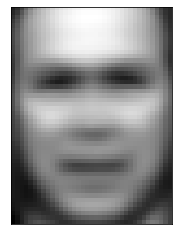

In [22]:
plt.imshow(pca.mean_.reshape(faces.images[0].shape),cmap=plt.cm.gray)
plt.xticks(())
plt.yticks(())
plt.show()

👉 Access your first PC. What's its shape? Print it as pd.Series or NDarray. What does each values represents?

In [25]:
import pandas as pd

In [26]:
pd.DataFrame(pca.components_[0])

,0
0,-0.006817
1,-0.007364
2,-0.008550
3,-0.010022
4,-0.011143
...,...
1845,-0.017788
1846,-0.016010
1847,-0.014045
1848,-0.011956


In [27]:
pca.components_[0].shape

(1850,)

Each PC is a flatten "image" of 1850 pixels

- Your first PC are the most important "directions" on of your 1850-dimension dataset.

- They are the most important "linear combination of your 1850 pixels".

- The ones which preserves the most "variance" when your dataset of pictures is projected onto it.

- The first few PCs are the regions of the 2D pixel grid that bear the most differences between your 1288 images

👉 Image-Plot the **5 first** principal components, as well as the **last** one.
Do you see more intuitively what PC are? 

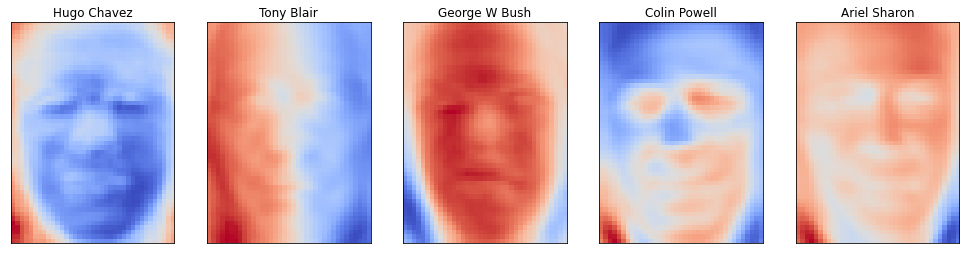

In [29]:
# Use a coolwarm map (warm = positive)
# First PCs
fig = plt.figure(figsize=(17,10))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(pca.components_[i].reshape(faces.images[0].shape), cmap=plt.cm.coolwarm)
    plt.xticks(())
    plt.yticks(())

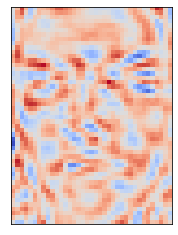

In [32]:
# Last PCs
plt.imshow(pca.components_[-1].reshape(faces.images[-1].shape), cmap=plt.cm.coolwarm)
plt.xticks(())
plt.yticks(())
plt.show()

Every image can be represented by the "mean face" plus a linear combination of the 150 "PC faces".

## How to Choose the Number of Components?

In practice, it is very important to find how many components are needed to describe the data without losing too much information. This can be determined visually by plotting the cumulative sum of `explained_variance_ratio_` as a function of the number of components.
 
👉 Plot it below for the firt 150 components

In [37]:
import numpy as np

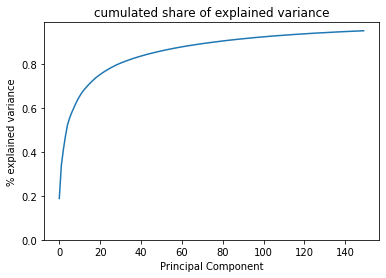

In [43]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.ylim(ymin=0)
plt.title('cumulated share of explained variance')
plt.xlabel('Principal Component'); plt.ylabel('% explained variance');

This curve quantifies how much of the total variance is contained within the first components. For example:
- The first 20 components contain more than 75% of the variance,
- while we need about only 70 components to describe 90% of the variance!

**❓ What is the minimal number of components you need to keep to get _at least_ 80% of the variance?**

In [56]:
np.where(np.cumsum(pca.explained_variance_ratio_) <= 0.80)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),)

In [57]:
minimal_pc_count = 28 +2 # fill with the right answer

### 🧪 Test your code

In [58]:
from nbresult import ChallengeResult

result = ChallengeResult('components', min_pc = minimal_pc_count)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.8.6, pytest-6.2.3, py-1.10.0, pluggy-0.13.1 -- /Users/smrack/.pyenv/versions/3.8.6/envs/lewagon/bin/python3.8
cachedir: .pytest_cache
rootdir: /Users/smrack/code/olushO/data-challenges/05-ML/06-Unsupervised-Learning/02-Face-Recognition
plugins: anyio-2.2.0, dash-1.20.0
collecting ... collected 1 item

tests/test_components.py::TestComponents::test_minimal_pc PASSED         [100%]

============================== 1 passed in 0.03s ===============================


💯 You can commit your code:

git add tests/components.pickle

git commit -m 'Completed components step'

git push origin master


## Classify images (PCA as feature engineering)

You have this dataset of faces and you want to build a face recognition engine to predict `faces.target` which is annotation of every face to the corresponding person (as a number index)

You can now use this low-dimensional new transformation you just created, that is still representative of the faces to train your supervised algorithm!

### Train test split the face dataset

👉 Use the train test split function from scikit to separate __the original faces dataset__ into training and testing set, `X_train`, `X_test`, `y_train`, `y_test`

In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.3)

In [94]:
X_train.shape, y_train.shape

((901, 1850), (901,))

### Transform your training set to reduce the number of dimensions / features

👉 Fit a PCA __over the training data only__ and transform your training data into the reduced dimension (150 features for example).

In [95]:
pca_ = PCA(n_components=150).fit(X_train.data)
X_train_pca = pca_.transform(X_train)
X_train_pca.shape

(901, 150)

👉 Using this same PCA (only trained on the training set) transform your testing set as well

In [96]:
X_test_pca = pca_.transform(X_test)
X_test_pca.shape

(387, 150)

### Cross validate your choice of best hyperparameters

👉 Call a cross validated grid search for an SVM, where you loop over all combinations of

- kernels
- "C between 10 and 10000
- "gamma" between 0.0001 and 0.1

👉 Use `n_jobs=-1` to make use of all your core CPUs

👉 Use `f1_weighted` as the performance metric

In [97]:
from sklearn.model_selection import cross_val_score, RandomizedSearchCV
from sklearn.svm import SVC
from scipy import stats
#from sklearn.metrics import f1_score, make_scorer
model = SVC()

In [98]:
# Hyperparameter Grid
grid = {'C': stats.uniform(10, 10000), 
        'gamma': stats.uniform(0.0001, 0.1),
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
       }

# Instanciate Grid Search
search = RandomizedSearchCV(model, grid, 
                            n_iter=100,  # number of draws
                            cv=5, 
                            scoring='f1_weighted',
                            n_jobs=-1)

👉 Train that cross validation grid search over our newly transformed training set. (Long computation)

In [99]:
# Fit only using 150 PC features instead of 1850 pixels! Much faster! 
search.fit(X_train_pca, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x139a734c0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x139a73850>,
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid']},
                   scoring='f1_weighted')

👉 Print the [classification report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report) of your best model over the testing set 

In [102]:
from sklearn.metrics import classification_report
print(classification_report(search.best_estimator_.predict(X_test_pca), y_test))

              precision    recall  f1-score   support

           0       0.67      0.75      0.71        16
           1       0.83      0.79      0.81        76
           2       0.71      0.73      0.72        30
           3       0.86      0.84      0.85       165
           4       0.72      0.69      0.71        42
           5       0.78      0.82      0.80        17
           6       0.64      0.73      0.68        41

    accuracy                           0.79       387
   macro avg       0.74      0.76      0.75       387
weighted avg       0.79      0.79      0.79       387



In [103]:
from sklearn.metrics import classification_report
print(classification_report(y_test, search.best_estimator_.predict(X_test_pca)))

              precision    recall  f1-score   support

           0       0.75      0.67      0.71        18
           1       0.79      0.83      0.81        72
           2       0.73      0.71      0.72        31
           3       0.84      0.86      0.85       161
           4       0.69      0.72      0.71        40
           5       0.82      0.78      0.80        18
           6       0.73      0.64      0.68        47

    accuracy                           0.79       387
   macro avg       0.76      0.74      0.75       387
weighted avg       0.79      0.79      0.79       387



👉 Try to improve this score with the best choice of PCA components

<details>
    <summary>💡 Hint</summary>
    
- Try to pipeline your preprocessing (PCA) and your modelling (SVC)
- A pipeline is an instance of Scikit-Learn `Estimator` which hyperparameters can be grid searched
- Consider `n_components` as an hyperparameter of your pipeline!
    
</details>

In [ ]:
# YOUR CODE HERE

**❓ How many components give the best score?**

In [ ]:
best_n_components = ?

### 🧪 Test your code

In [ ]:
from nbresult import ChallengeResult

result = ChallengeResult('classification', best_pc=best_n_components)
result.write()
print(result.check())

🏁 **Congratulation! Don't forget to commit and push your notebook**